In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [47]:
x = np.random.randint(0, 2, 10)
bp = 0.000001
x

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [48]:
bit = np.array([])
for n in range(len(x)):
    if x[n] == 1:
        se = np.ones(100)
    else:
        se = np.zeros(100)
    bit = np.concatenate((bit, se))
len(bit)

1000

In [49]:
t1 = np.arange(bp/100, 100*len(x)*(bp/100) + bp/100, bp/100)
t1 = t1[:len(bit)]

Text(0.5, 1.0, 'Transmitting Information as Digital Signal')

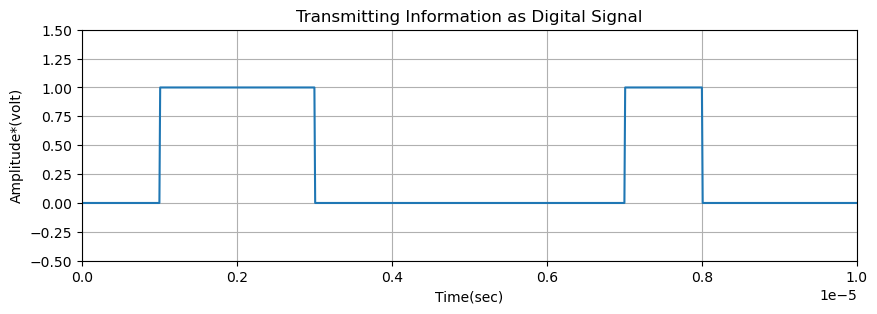

In [50]:
plt.figure(figsize=(10, 3))
plt.plot(t1, bit)
plt.grid(True)
plt.axis([0, bp*len(x), -0.5, 1.5])
plt.ylabel('Amplitude*(volt)')
plt.xlabel('Time(sec)')
plt.title('Transmitting Information as Digital Signal')

**Binary ASK Modulation**

In [51]:
A1 = 10
A2 = 5
br = 1/bp
f = br*10

In [52]:
t2 = np.arange(bp/99, bp + bp/99, bp/99)
len(t2)

99

In [56]:
m = np.array([])
for i in range(len(x)):
    if x[i] == 1:
        y = A1*np.cos(2*np.pi*f*t2)
    else:
        y = A2*np.cos(2*np.pi*f*t2)
    m = np.concatenate((m, y))

len(m)

990

In [57]:
t3 = np.arange(bp/99, bp*len(x) + bp/99, bp/99)
t3 = t3[:len(m)]
len(t3)

990

Text(0.5, 1.0, 'Waveform for binary ASK Modulation Corresponding Binary Information')

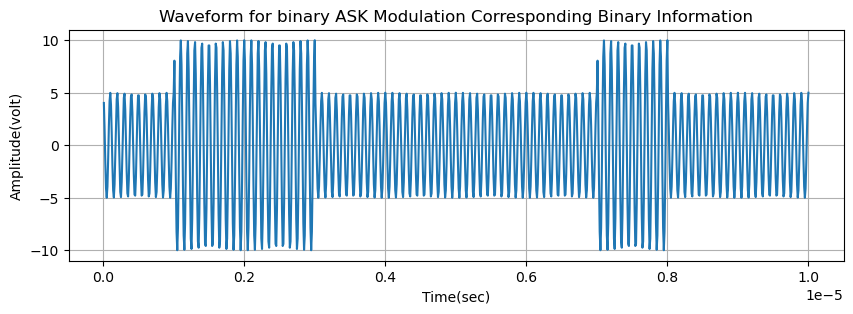

In [58]:
plt.figure(figsize=(10,3))
plt.plot(t3, m)
plt.grid(True)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude(volt)')
plt.title('Waveform for binary ASK Modulation Corresponding Binary Information')

**Binary ASK Demodulation**

In [76]:
ss = len(t2)
ss

99

In [86]:
mn = np.array([])
for n in range(ss-1, len(m), ss):
    t = np.arange(bp/99, bp + bp/99, bp/99)
    y = np.cos(2*np.pi*f*t)
    mm = y*m[n-ss+1:n+1]
    z = simps(mm, t)
    zz = round((2*z/bp))
    if zz > 7.5:
        a = 1
    else:
        a = 0
    mn = np.append(mn, a)

In [87]:
len(mn)

10

In [88]:
bit = np.array([])
for n in range(len(mn)):
    if mn[n] == 1:
        se = np.ones(100)
    else:
        se = np.zeros(100)
    bit = np.concatenate((bit, se))

In [92]:
t4 = np.arange(bp/100, 100*len(mn)*(bp/100) + bp/100, bp/100)
t4 = t4[:len(bit)]

Text(0.5, 1.0, 'Received Information as Digital Signal')

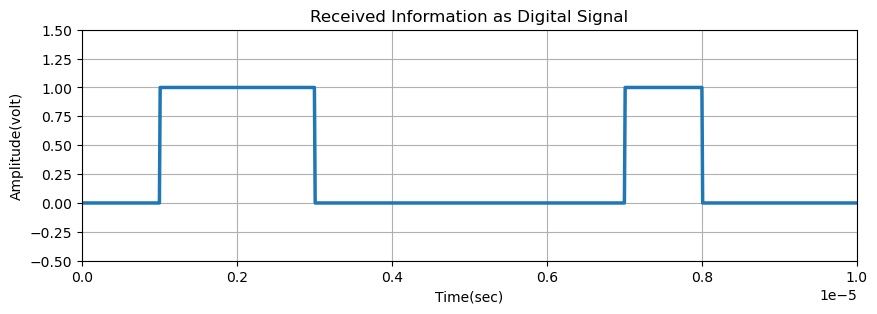

In [93]:
plt.figure(figsize=(10, 3))
plt.plot(t4, bit, linewidth=2.5)
plt.grid(True)
plt.axis([0, bp*len(mn), -0.5, 1.5])
plt.ylabel('Amplitude(volt)')
plt.xlabel('Time(sec)')
plt.title('Received Information as Digital Signal')